In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn import svm
from sklearn import metrics 
import seaborn as sns

In [2]:
#import customer booking data
data = pd.read_csv('customer_booking.csv', encoding='latin-1')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Data Types

| Variable | Type |
| --- | --- |
| num_passengers | numerical |
| sales_channel | catagorical (binary) |
| trip_type | numerical |
| purchase_lead | numerical |
| length_of_stay | numerical |
| flight_hour | numerical |
| flight_day | catagorical |
| route | catagorical |
| booking_origin | catagorical |
| wants_extra_baggage | catagorical (binary) |
| wants_preferred_seat | catagorical (binary) |
| wants_in_flight_meals | catagorical (binary) |
| flight_duration | numerical |
| booking_complete | catagorical (binary) |

In [4]:
#search for single valued variables (remove any that exist)
print(data.nunique())

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64


## Data Pre-Proccessing

Removal of duplicates, catagorical encoding and exploration of independent variable variance

In [5]:
#find and print any rows containing duplicate information
dups = data.duplicated()
print(data[dups])

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
196                 5      Internet  RoundTrip            206              17   
316                 5      Internet  RoundTrip            206              17   
384                 5      Internet  RoundTrip            206              17   
456                 1      Internet  RoundTrip             30              85   
513                 3      Internet  RoundTrip            109              20   
...               ...           ...        ...            ...             ...   
49852               2      Internet  RoundTrip            204               6   
49902               1        Mobile  RoundTrip            106               6   
49934               1      Internet  RoundTrip              2               6   
49944               1      Internet  RoundTrip              2               6   
49961               1      Internet  RoundTrip             30               6   

       flight_hour flight_d

In [6]:
#number of rows before deletion
print(data.shape)
# delete duplicate rows
data.drop_duplicates(inplace=True)
#number of rows after deletion
print(data.shape)

(50000, 14)
(49281, 14)


In [7]:
#create a copy of the data where catagorical variables are encoded with numeric values
data_encoded = data.copy()
data_encoded[['sales_channel', 'trip_type','flight_day', 'route','booking_origin']] = data_encoded[['sales_channel', 'trip_type','flight_day', 'route','booking_origin']].apply(preprocessing.LabelEncoder().fit_transform)
data_encoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [8]:
#calculate the variance of each variable and sort
data_encoded.var().sort_values()

trip_type                    0.017091
sales_channel                0.097000
booking_complete             0.127486
wants_preferred_seat         0.208238
wants_extra_baggage          0.221703
wants_in_flight_meals        0.244623
num_passengers               1.033349
flight_duration              2.239183
flight_day                   4.123831
flight_hour                 29.301640
booking_origin            1074.906495
length_of_stay            1144.614335
purchase_lead             8174.009525
route                    51651.848916
dtype: float64

## Modelling

Creation of a SkLearn Pipeline which incorporates a column transformer to encode both the catagorical and numerical variables and a classifier which can predict booking completion based on provided data

In [9]:
#split the data absed on independent and dependent variables
target_name = "booking_complete"
target = data[target_name]

ind_data = data.copy().drop(columns=[target_name])

In [10]:
#create numerical and catagorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

#define which columns are numerical and catagorical
numerical_columns = numerical_columns_selector(ind_data)
categorical_columns = categorical_columns_selector(ind_data)

In [11]:
#create column transformers for each type of column
categorical_preprocessor = preprocessing.OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = preprocessing.StandardScaler()

In [12]:
#create a column transformers which incorprates both numerical and catagorical column transformers
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
preprocessor

ColumnTransformer(transformers=[('one-hot-encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sales_channel', 'trip_type', 'flight_day',
                                  'route', 'booking_origin']),
                                ('standard_scaler', StandardScaler(),
                                 ['num_passengers', 'purchase_lead',
                                  'length_of_stay', 'flight_hour',
                                  'wants_extra_baggage', 'wants_preferred_seat',
                                  'wants_in_flight_meals',
                                  'flight_duration'])])

In [13]:
#split data into train and test set
data_train, data_test, target_train, target_test = train_test_split(
    data, target)

In [14]:
#create a pipeline using the column transformer and a logistic regression classifier
log_pipe = Pipeline([("scaler", preprocessor),
        ("classifier", LogisticRegression(max_iter=500))])
log_pipe

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['num_passengers',
                                                   'purchase_lead',
                                                   'length_of_stay',
                                                   'flight_hour',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals',
                                                   'flight_duration'])])),
                ('classifier', LogisticRegression(max_iter=500))])

In [15]:
#fit data to the pipeline
_ = log_pipe.fit(data_train, target_train)

In [78]:
#calculate accuracy
print("Logistic Regression Accuracy:",round(log_pipe.score(data_test, target_test), 4) * 100,"%")

Logistic Regression Accuracy: 84.73 %


In [79]:
#cross validate pipeline
cv_results = cross_validate(log_pipe, data, target, cv=5)
cv_results

{'fit_time': array([0.79686975, 0.76694989, 0.81382418, 0.82080579, 0.78988838]),
 'score_time': array([0.01695466, 0.01795197, 0.01994729, 0.01695395, 0.01695514]),
 'test_score': array([0.8506645 , 0.80194805, 0.80854302, 0.83928571, 0.82842938])}

In [80]:
#calculate and print cross validated accuracy and margin for error
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.826 ± 0.018


In [62]:
#calculate predictions based on test set
y_pred = log_pipe.predict(data_test)

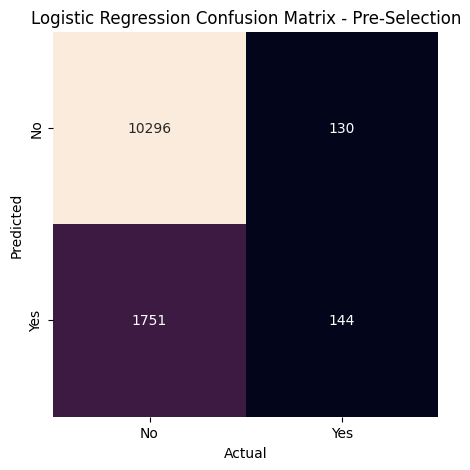

In [63]:
#plot predicted and actual values as a Confusion matrix
confusion = metrics.confusion_matrix(target_test, y_pred)
names =["No", "Yes"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(5,5)
plt.title('Logistic Regression Confusion Matrix - Pre-Selection')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [59]:
forest_pipe = Pipeline([("scaler", preprocessor),
                      ("classifier", RandomForestClassifier())])
forest_pipe

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['num_passengers',
                                                   'purchase_lead',
                                                   'length_of_stay',
                                                   'flight_hour',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals',
                                                   'flight_duration'])])),
                ('classifier', RandomForestClassifier())])

In [66]:
_ = forest_pipe.fit(data_train, target_train)

In [75]:
print("Random Forest Accuracy:",round(forest_pipe.score(data_test, target_test), 4) * 100,"%")

Random Forest Accuracy: 84.43 %


In [76]:
cv_results = cross_validate(forest_pipe, data, target, cv=5)
cv_results

{'fit_time': array([55.34361053, 51.84838867, 50.13696408, 49.9165535 , 53.30849957]),
 'score_time': array([0.23636818, 0.23038459, 0.22240591, 0.20345592, 0.22340274]),
 'test_score': array([0.84964999, 0.75831981, 0.72280844, 0.53632305, 0.7674513 ])}

In [77]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.727 ± 0.104


In [67]:
y_pred = forest_pipe.predict(data_test)

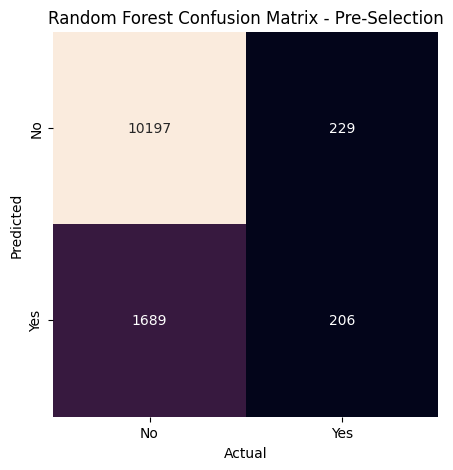

In [68]:
confusion = metrics.confusion_matrix(target_test, y_pred)
names =["No", "Yes"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(5,5)
plt.title('Random Forest Confusion Matrix - Pre-Selection')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [28]:
feat_select_data = data[['trip_type', 'sales_channel', 'booking_complete', 'wants_preferred_seat', 
                                                     'wants_extra_baggage', 'wants_in_flight_meals', 'num_passengers', 
                                                     'flight_duration', 'flight_day']]

In [29]:
target = feat_select_data[target_name]

ind_data = feat_select_data.copy().drop(columns=[target_name])

In [30]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(ind_data)
categorical_columns = categorical_columns_selector(ind_data)

In [31]:
categorical_preprocessor = preprocessing.OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = preprocessing.StandardScaler()

In [32]:
preprocessor_select = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
preprocessor_select

ColumnTransformer(transformers=[('one-hot-encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['trip_type', 'sales_channel', 'flight_day']),
                                ('standard_scaler', StandardScaler(),
                                 ['wants_preferred_seat', 'wants_extra_baggage',
                                  'wants_in_flight_meals', 'num_passengers',
                                  'flight_duration'])])

In [33]:
data_train_select, data_test_select, target_train_select, target_test_select = train_test_split(
    feat_select_data, target)

In [34]:
log_pipe_select = make_pipeline(preprocessor_select, LogisticRegression(max_iter=500))
log_pipe_select

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['trip_type', 'sales_channel',
                                                   'flight_day']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['wants_preferred_seat',
                                                   'wants_extra_baggage',
                                                   'wants_in_flight_meals',
                                                   'num_passengers',
                                                   'flight_duration'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [69]:
_ = log_pipe_select.fit(data_train_select, target_train_select)

In [81]:
print("Logistic Regression Accuracy:",round(log_pipe_select.score(data_test_select, target_test_select), 4) * 100,"%")

Logistic Regression Accuracy: 85.04 %


In [82]:
cv_results = cross_validate(log_pipe_select, feat_select_data, target, cv=5)
cv_results

{'fit_time': array([0.11569118, 0.13464046, 0.12865591, 0.13563776, 0.12067747]),
 'score_time': array([0.00797844, 0.00897574, 0.00797892, 0.00797844, 0.00897646]),
 'test_score': array([0.84995435, 0.85004058, 0.85004058, 0.85004058, 0.85004058])}

In [83]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.850 ± 0.000


In [70]:
y_pred = log_pipe_select.predict(data_test_select)

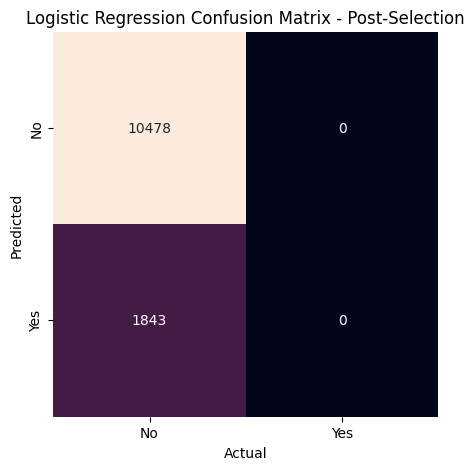

In [71]:
confusion = metrics.confusion_matrix(target_test_select, y_pred)
names =["No", "Yes"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(5,5)
plt.title('Logistic Regression Confusion Matrix - Post-Selection')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [54]:
forest_pipe_select = make_pipeline(preprocessor_select, RandomForestClassifier())
forest_pipe_select

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['trip_type', 'sales_channel',
                                                   'flight_day']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['wants_preferred_seat',
                                                   'wants_extra_baggage',
                                                   'wants_in_flight_meals',
                                                   'num_passengers',
                                                   'flight_duration'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [72]:
_ = forest_pipe_select.fit(data_train_select, target_train_select)

In [84]:
print("Random Forest Accuracy:",round(forest_pipe_select.score(data_test_select, target_test_select), 4) * 100,"%")

Random Forest Accuracy: 83.71 %


In [85]:
cv_results = cross_validate(forest_pipe_select, data, target, cv=5)
cv_results

{'fit_time': array([1.6665442 , 1.68948317, 1.67552042, 1.63462949, 1.61368823]),
 'score_time': array([0.13563681, 0.13264537, 0.13962698, 0.14660835, 0.14161921]),
 'test_score': array([0.84193974, 0.8184862 , 0.84618506, 0.8161526 , 0.82112419])}

In [86]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 0.829 ± 0.013


In [73]:
y_pred = forest_pipe_select.predict(data_test_select)

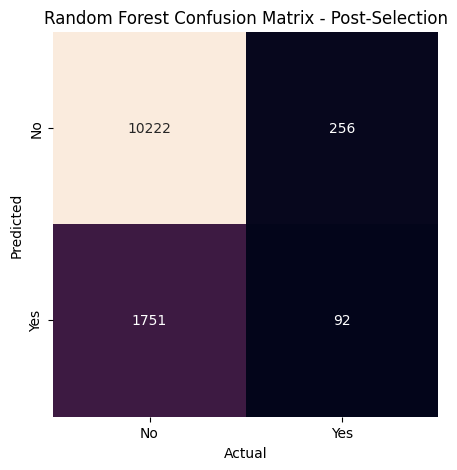

In [74]:
confusion = metrics.confusion_matrix(target_test_select, y_pred)
names =["No", "Yes"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(5,5)
plt.title('Random Forest Confusion Matrix - Post-Selection')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()